<a href="https://colab.research.google.com/github/MARTINROCA/Data_Storytelling_Roca/blob/main/Data_Storytelling_Roca_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
* Contexto empresarial: la empresa se dedica a la venta online de productos y se tomaron datos de diferentes usuarios en el período de un año. Cada registro corresponde a una sesión de usuarios distintos 

* Contexto analítico: Se nos proporciona un archivo csv con las operaciones que realizó cada usuario en donde se registraron distintos indicadores y si la persona terminó adquiriendo el producto o no.

# Hipótesis:
* A mayor tiempo de duración en páginas similares mayor probabilidad de venta
* Mayor ExitRate menor probabilidad de compra
* Mayor PageValue mayor probabilidad de compra
* Las ventas crecen los fines de semana y los períodos anteriores a días especiales
* Hay estacionalidad en las compras 
* La mayoria de las compras las realizan al volver a visitar la pagina

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=4d31a45c1d0ba59686149ec0734a2019d1332defb0c7e63ce04c91c1e3ce740f
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly as py 
import os 
from bokeh.resources import INLINE 
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
from itertools import count
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE/online_shoppers_intention.csv')

NameError: ignored

In [ ]:
d_desc = {'Administrative':'number of pages of this type (administrative) that the user visited.',
          'Administrative_Duration':'the amount of time spent in this category of pages.',
          'Informational':' the number of pages of this type (informational) that the user visited.',
          'Informational_Duration':'the amount of time spent in this category of pages.',
          'ProductRelated':' the number of pages of this type (product related) that the user visited. ',
          'ProductRelated_Duration':' the amount of time spent in this category of pages.',
          'BounceRates':'The percentage of visitors who enter the website through that page and exit without triggering any additional tasks. ',
          'ExitRates':'The percentage of pageviews on the website that end at that specific page.',
          'PageValues':'The average value of the page averaged over the value of the target page and/or the completion of an eCommerce',
          'SpecialDay':'closeness of the browsing date to special days or holidays in ',
          'Month':'the month the pageview occurred',
          'OperatingSystems':'An integer value representing the operating system that the user was on when viewing the page',
          'Browser':'the browser that the user was using to view the page. ',
          'Region':' integer value representing which region the user is located in ',
          'TrafficType':'An integer value representing what type of traffic the user is categorized into.',
          'VisitorType':'whether a visitor is New Visitor, Returning Visitor, or Other ',
          'Weekend':' boolean representing whether the session is on a weekend.',
          'Revenue':'boolean representing whether or not the user completed the purchase.'}

In [ ]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df1.shape

(12330, 18)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Selección datos numéricos

In [ ]:
df_num = df1.select_dtypes('number') 
df_num['Revenue'] = df1['Revenue']
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,False


### Valores duplicados

In [ ]:
df_num.drop_duplicates(inplace=True)

In [ ]:
len(df_num)

12016

In [ ]:
df_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000
mean,2.375666,82.930548,0.516728,35.373225,32.531708,1225.963124,0.017595,0.039000,6.043155,0.062883,2.124834,2.362101,3.157956,4.076897
std,3.343483,178.584445,1.284001,142.464803,44.772915,1928.617897,0.039660,0.042056,18.784765,0.201055,0.905283,1.711227,2.403808,4.008594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,207.563103,0.000000,0.013947,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,11.000000,0.000000,0.000000,19.000000,630.413333,0.002632,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,96.500000,0.000000,0.000000,39.000000,1501.208333,0.015385,0.046154,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


ProductRelated  the number of pages of this type (product related) that the user visited. 


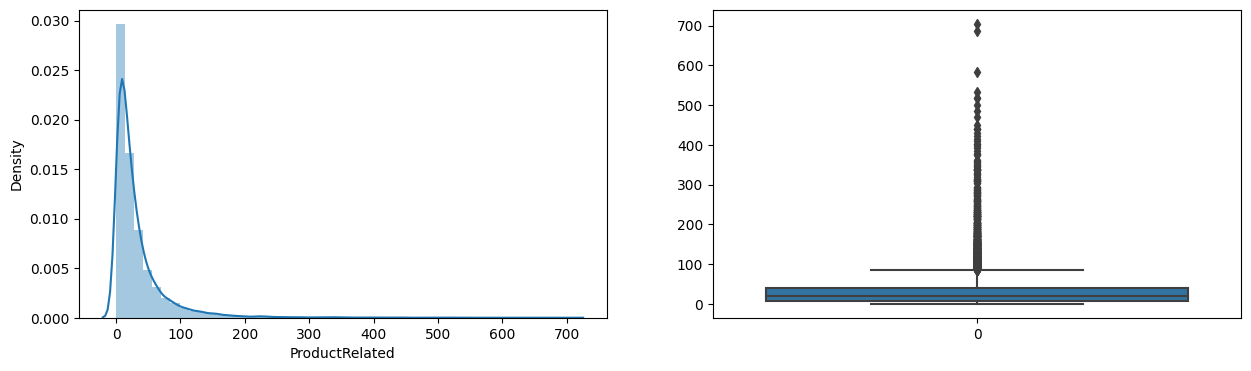

ProductRelated_Duration  the amount of time spent in this category of pages.


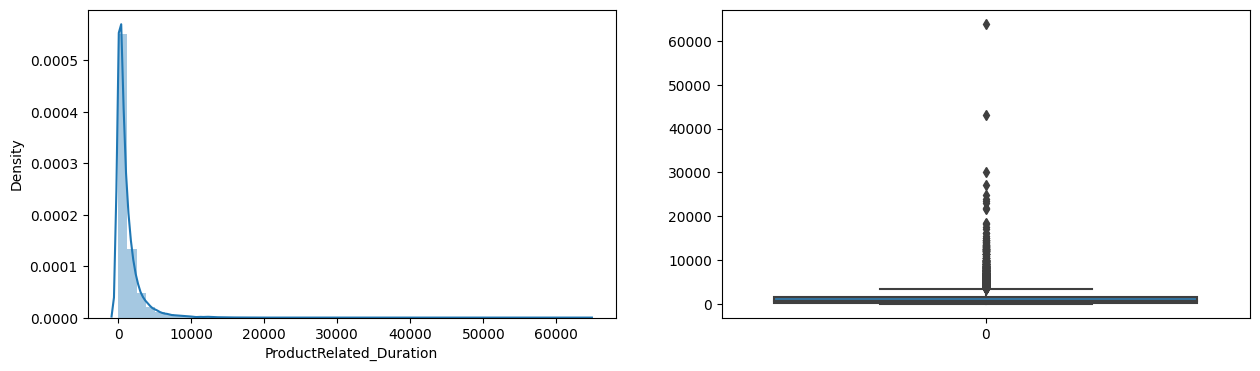

SpecialDay closeness of the browsing date to special days or holidays in 


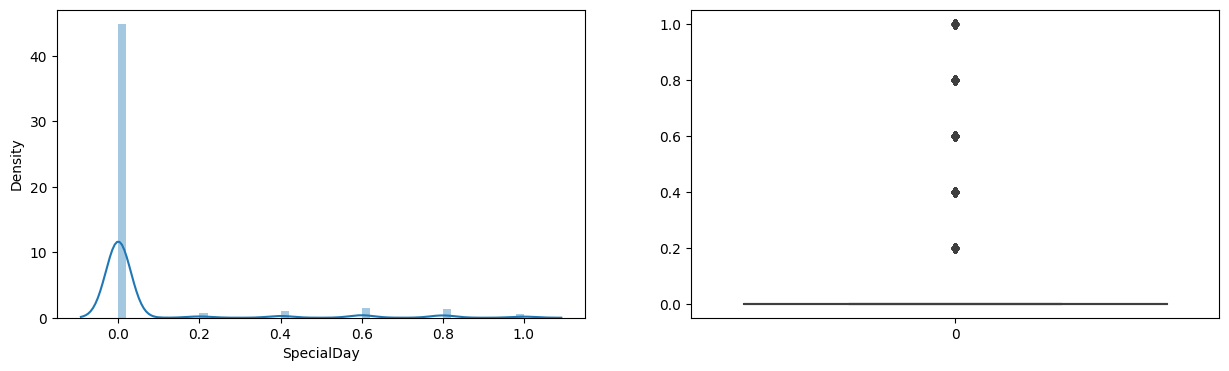

Region  integer value representing which region the user is located in 


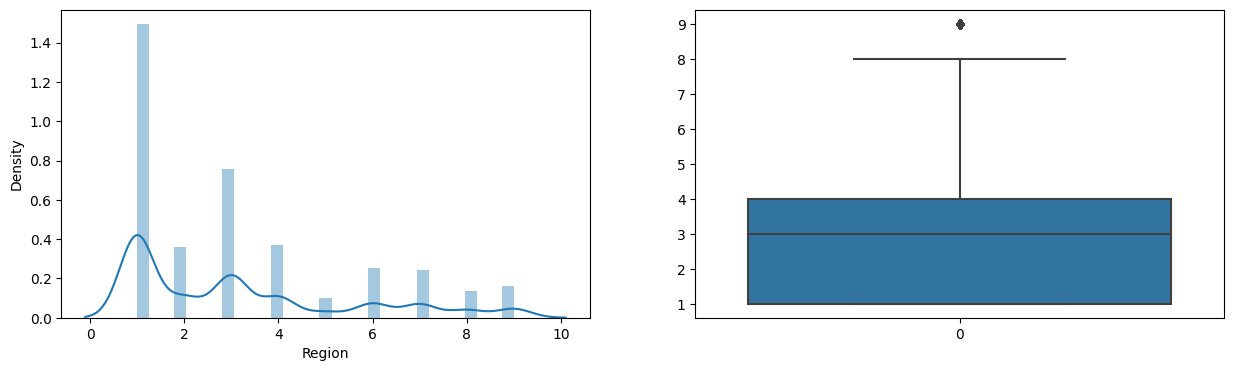

Browser the browser that the user was using to view the page. 


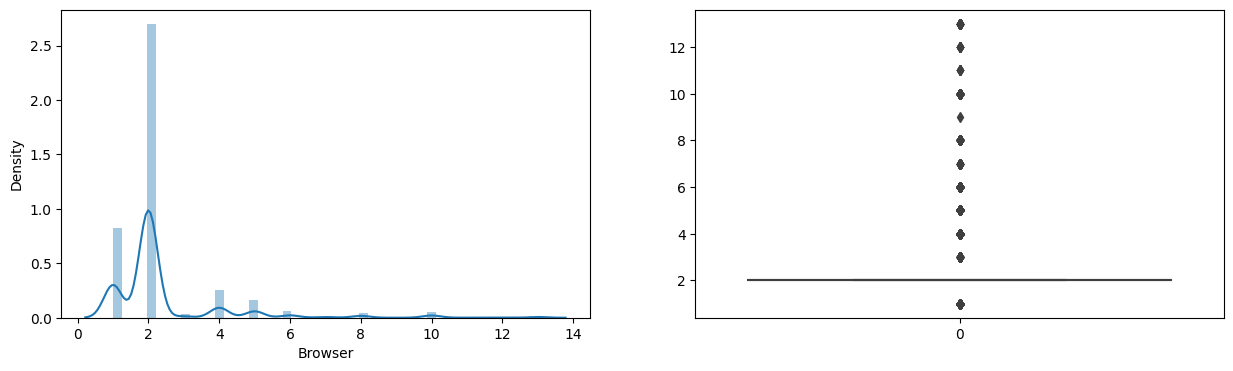

OperatingSystems An integer value representing the operating system that the user was on when viewing the page


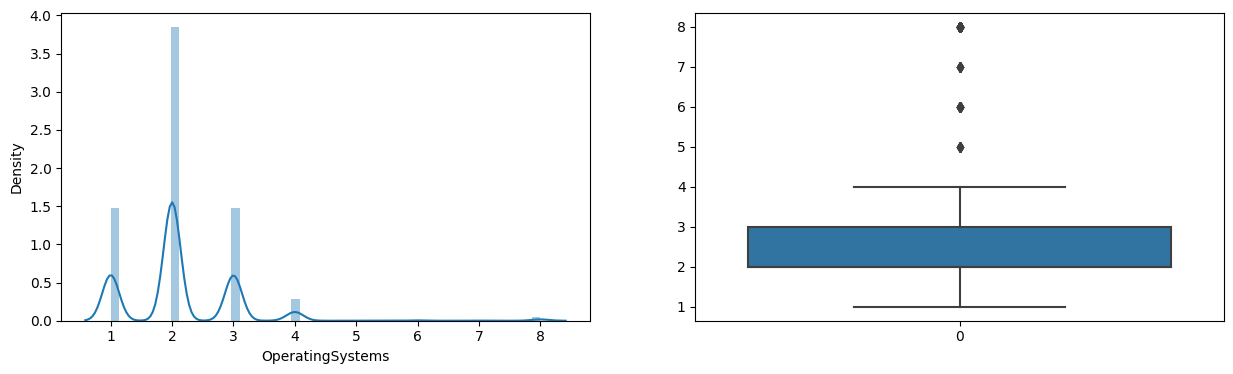

In [ ]:
for col in ['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Region', 'Browser', 'OperatingSystems']:
    print(col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

Observacciones:
* ProductRelated y Duration: se observan outliers cuando los potenciales clientes ven muchos productos relacionados y pasan mucho tiempo, sin embargo pueden ser datos importantes y muy relacionados a la compra final
* SpecialDay: ocurre lo mismo, los valores mayores a 0 se presentan como outliers pero debemos ver si tienen mucha relación con la compra final
* Region, Browser y OperatingSystems: se observan casos donde no se realizan muchas transacciones

ProductRelated  the number of pages of this type (product related) that the user visited. 


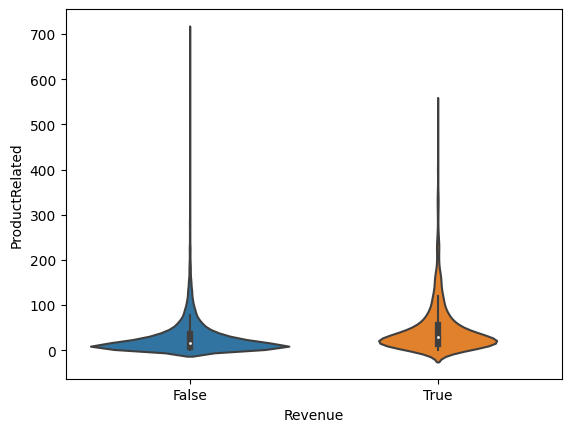

ProductRelated_Duration  the amount of time spent in this category of pages.


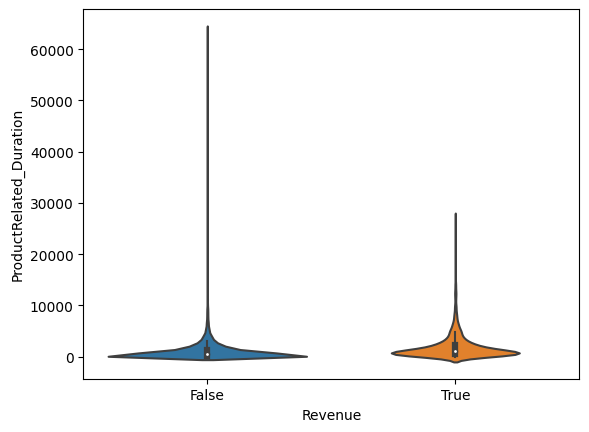

SpecialDay closeness of the browsing date to special days or holidays in 


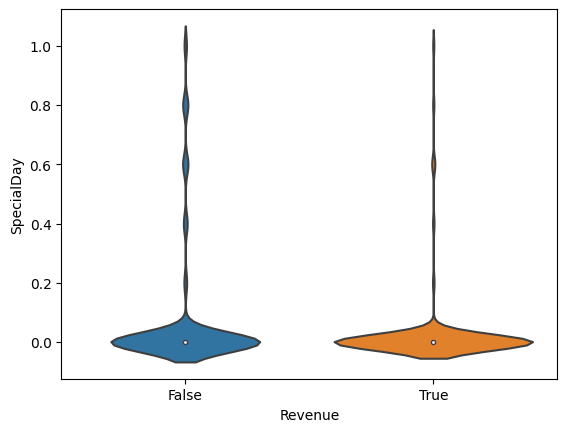

Region  integer value representing which region the user is located in 


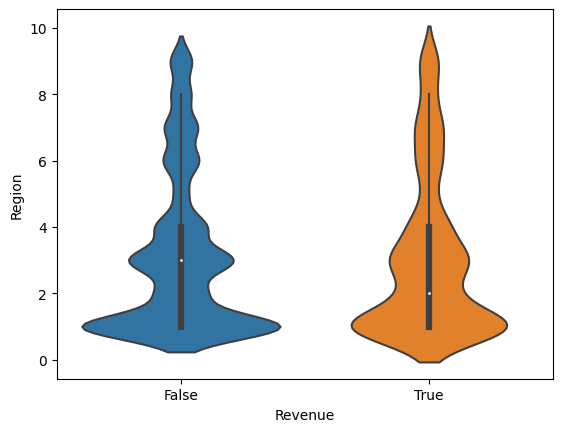

Browser the browser that the user was using to view the page. 


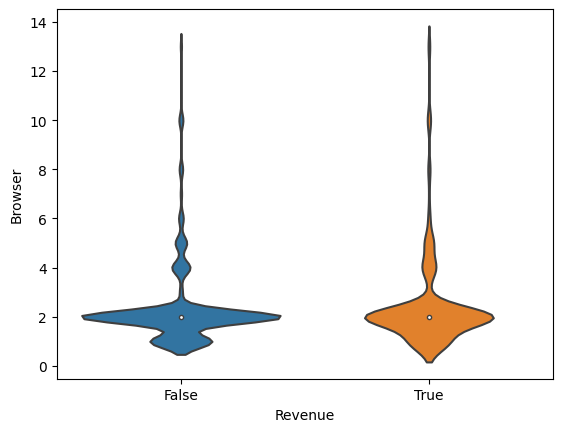

OperatingSystems An integer value representing the operating system that the user was on when viewing the page


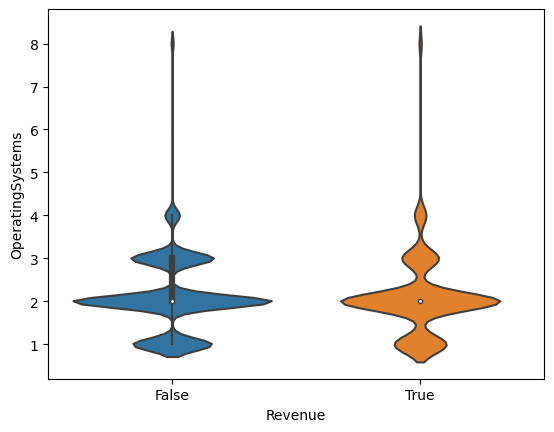

In [ ]:
for col in ['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Region', 'Browser', 'OperatingSystems']:
    print(col, d_desc[col])
    sns.violinplot(x='Revenue', y=col, data=df_num)
    plt.show()

Reemplazamos los Outliers de ProductRelated_Duration por el tope intercuartil

In [ ]:
Q1 = df1['ProductRelated_Duration'].quantile(0.25)
Q3 = df1['ProductRelated_Duration'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


3384.1867837500004

In [ ]:
df_num['ProductRelated_Duration_tope'] = df_num['ProductRelated_Duration']
df_num.loc[df_num['ProductRelated_Duration_tope']>tope, 'ProductRelated_Duration_tope'] = tope

### Cambiamos variable Revenue a numérica

In [ ]:
df_num.Revenue.unique()

array([False,  True])

In [ ]:
df_num.Revenue.value_counts()

False    10108
True      1908
Name: Revenue, dtype: int64

In [ ]:
df_num['Revenue'] = df_num['Revenue'].astype(int)

In [ ]:
df_num.Revenue.unique()

array([0, 1])

In [ ]:
df_num.Revenue.value_counts()

0    10108
1     1908
Name: Revenue, dtype: int64

In [ ]:
df_num[df_num.Revenue == 1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,ProductRelated_Duration_tope
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,2,2,3,1,1,798.333333
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,6,1,2,1,2111.341667
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,1,1,7,4,1,607.000000
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,2,2,7,2,1,1868.819697
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,2,2,4,2,1,2563.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,2,2,1,3,1,2664.445833
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,2,10,1,2,1,986.500000
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,2,2,1,2,1,3384.186784
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,2,5,1,2,1,3384.186784


([<matplotlib.axis.XTick at 0x7f37745c8340>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

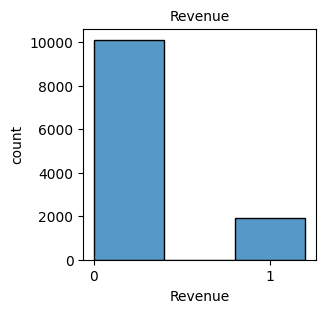

In [ ]:
f, axs = plt.subplots(figsize=(3, 3))
sns.histplot(df_num['Revenue'], binwidth=0.4)
plt.title('Revenue', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x7f37746003a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

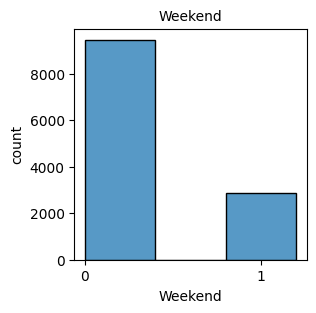

In [ ]:
f, axs = plt.subplots(figsize=(3, 3))
sns.histplot(df1['Weekend'], binwidth=0.4, palette='pastel')
plt.title('Weekend', fontsize = 10)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.xticks([0,1])

In [ ]:
month_count = df1.groupby('Month', as_index=False)['Revenue'].count()
month_count

,Month,Revenue
0,Aug,433
1,Dec,1727
2,Feb,184
3,Jul,432
4,June,288
5,Mar,1907
6,May,3364
7,Nov,2998
8,Oct,549
9,Sep,448


<Axes: xlabel='Month', ylabel='Revenue'>

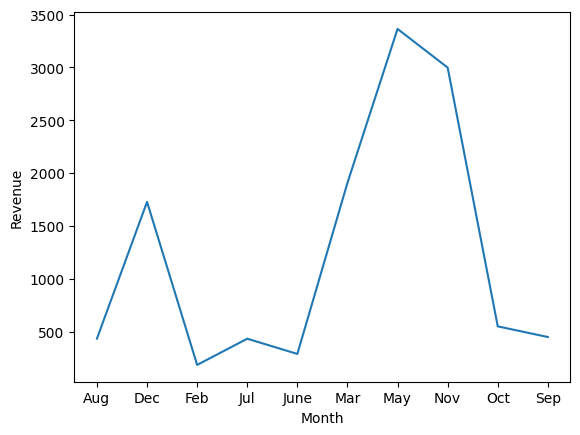

In [ ]:
sns.lineplot(data=month_count, x="Month", y='Revenue')

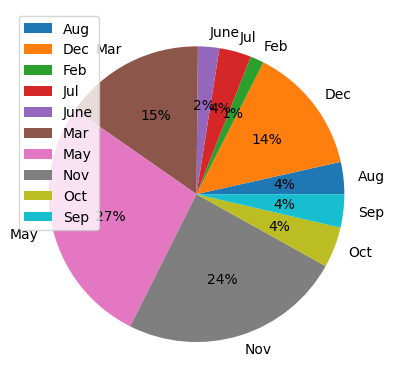

In [ ]:
revenues = month_count['Revenue'].tolist()
labels = month_count['Month'].tolist()
plt.pie(revenues, labels= labels, autopct='%.0f%%')
plt.legend(loc= 'upper left')

In [ ]:
browser_count = df1.groupby('Browser', as_index=False)['Revenue'].count()
browser_count

,Browser,Revenue
0,1,2462
1,2,7961
2,3,105
3,4,736
4,5,467
5,6,174
6,7,49
7,8,135
8,9,1
9,10,163


Text(0.5, 1.0, 'Browsers')

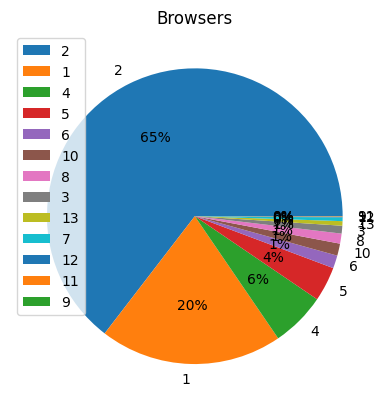

In [ ]:
browser = df1['Browser'].value_counts()
plt.pie(browser, labels= browser.index, autopct='%.0f%%')
plt.legend(loc= 'upper left')
plt.title('Browsers')

In [ ]:
browser

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

# Comparaciones Bivariadas con variable objetivo Revenue

<Axes: xlabel='Revenue', ylabel='ProductRelated_Duration_tope'>

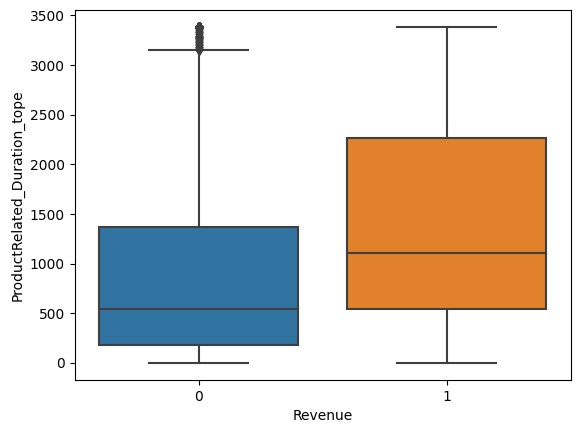

In [ ]:
sns.boxplot(x="Revenue", y="ProductRelated_Duration_tope", data=df_num)

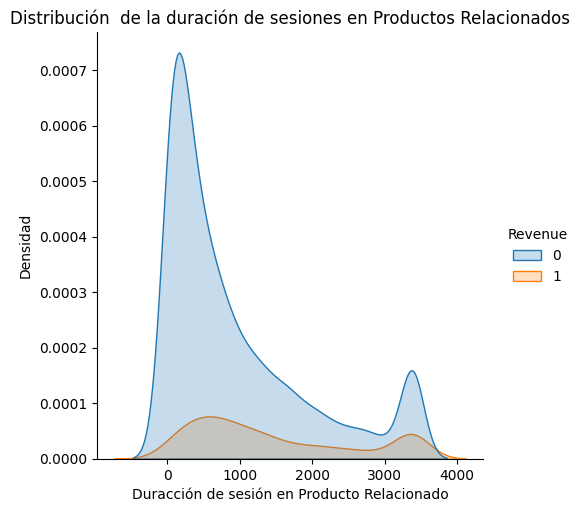

In [ ]:
ax = sns.displot(data=df_num, x='ProductRelated_Duration_tope', kind='kde', hue='Revenue', fill=True)
ax.set(xlabel='Duracción de sesión en Producto Relacionado', ylabel='Densidad', title='Distribución  de la duración de sesiones en Productos Relacionados')

### Hipótesis 1
Se observa una tendencia a que la venta se concrete cuando la duración de la sesión en un producto relacionado es mayor

<Axes: xlabel='Revenue', ylabel='ExitRates'>

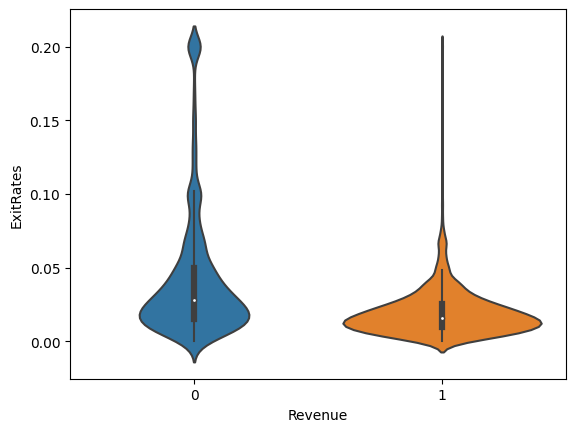

In [ ]:
 sns.violinplot(x='Revenue', y='ExitRates', data=df_num)

<Axes: xlabel='ExitRates', ylabel='Count'>

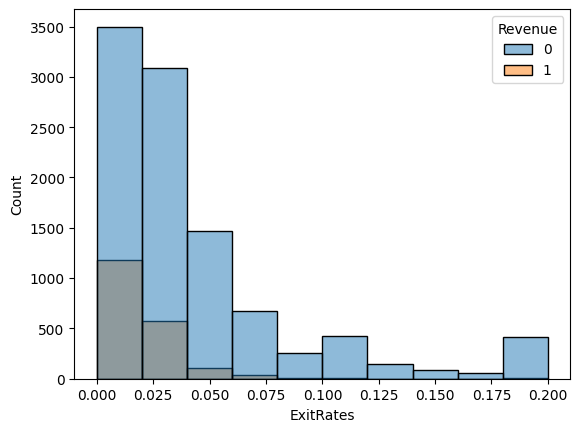

In [ ]:
sns.histplot(data=df_num, x="ExitRates", hue= 'Revenue', bins= 10)

### Hipótesis 2
A mayor ExitRate no se observa una diferencia en la decisión de compra, sin embargo podemos concluir que las compras se realizan cuando el ExitRate es bajo. 

<Axes: xlabel='Revenue', ylabel='PageValues'>

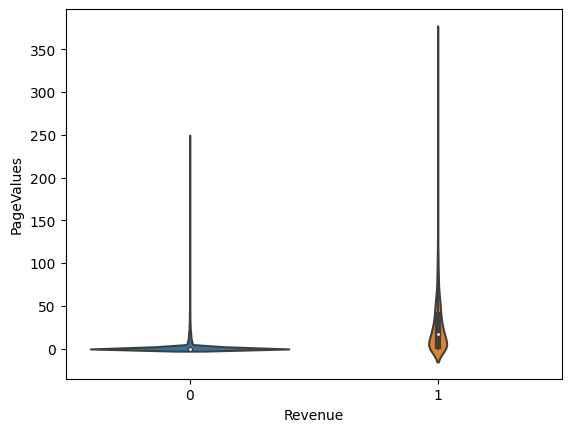

In [ ]:
 sns.violinplot(x='Revenue', y='PageValues', data=df_num)

<Axes: xlabel='PageValues', ylabel='Count'>

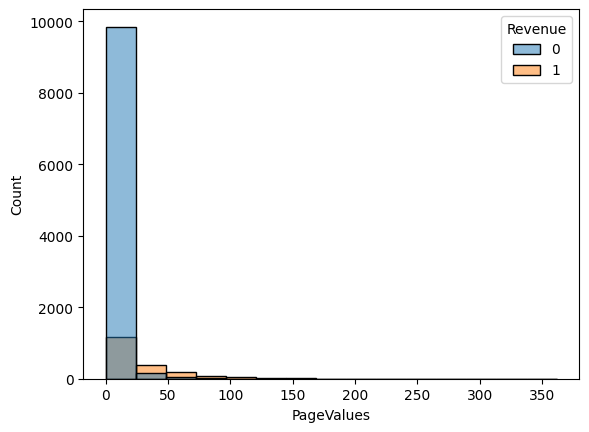

In [ ]:
sns.histplot(data=df_num, x="PageValues", hue= 'Revenue')

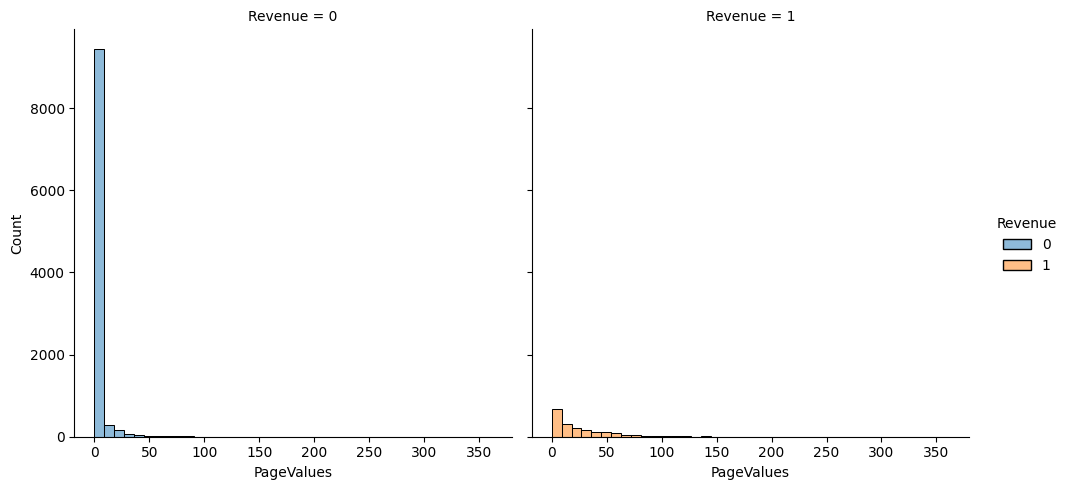

In [ ]:
sns.displot(data=df_num, x="PageValues", hue="Revenue", col="Revenue", bins=40)

<Axes: xlabel='Revenue', ylabel='PageValues'>

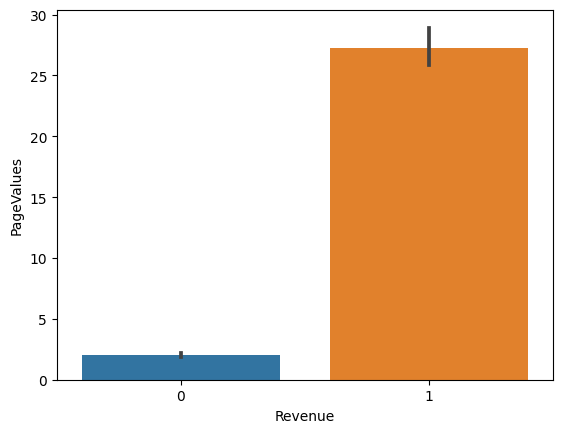

In [ ]:
sns.barplot(x="Revenue", y="PageValues", data=df_num)

### Hipótesis 3
Se observa mayor intención de compra cuando el PageValue es mayor a cero

<Axes: xlabel='SpecialDay', ylabel='count'>

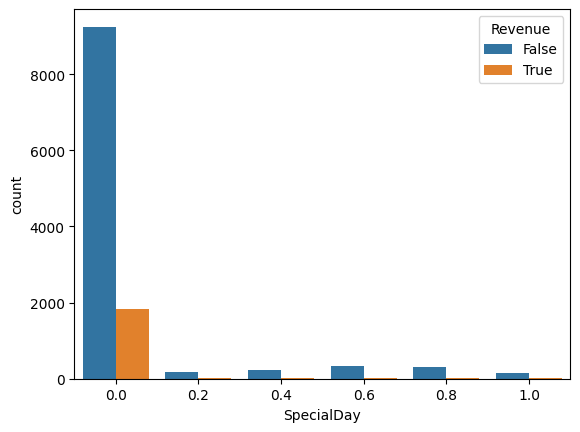

In [ ]:
sns.countplot(x='SpecialDay', data = df1, hue = 'Revenue')

<Axes: xlabel='Weekend', ylabel='count'>

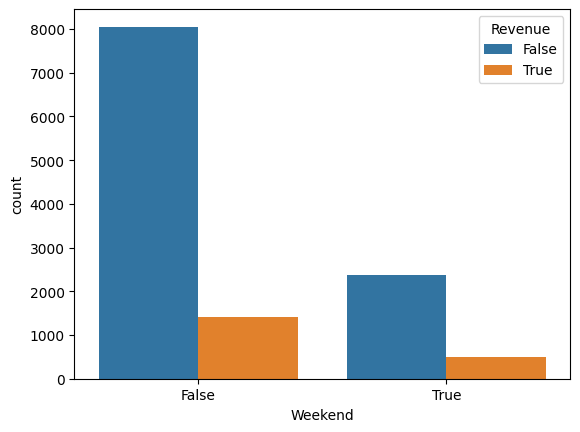

In [ ]:
sns.countplot(x='Weekend', data = df1, hue = 'Revenue')

### Hipótesis 4
No se observa diferencia en la intención de compra cerca de los fines de semana o días especiales

<Axes: xlabel='Month', ylabel='Count'>

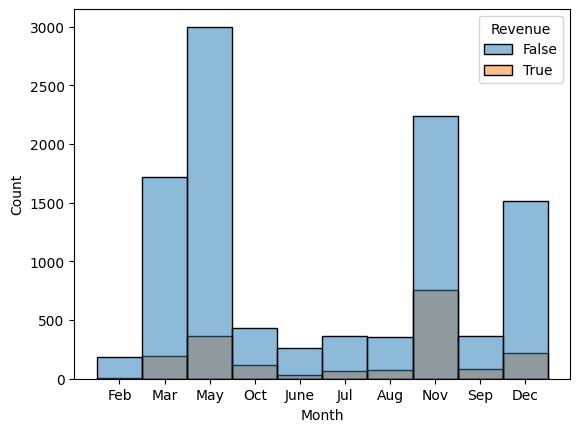

In [ ]:
sns.histplot(data=df1, x="Month", hue="Revenue")

### Hipótesis 5
Se observa estacionalidad con una clara mayor intención de compra en el mes de Noviembre.

<Axes: xlabel='VisitorType', ylabel='Count'>

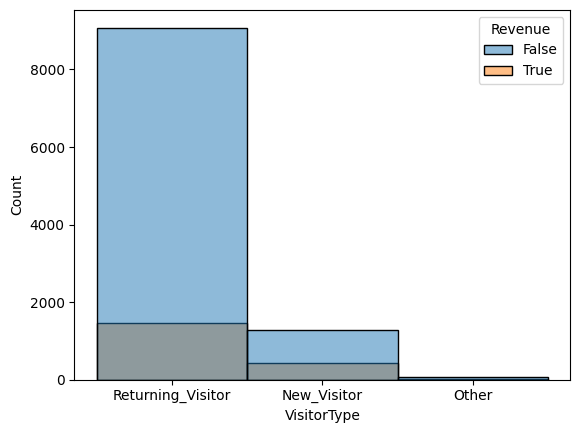

In [ ]:
sns.histplot(data=df1, x="VisitorType", hue="Revenue")

### Hipótesis 6 
La mayoría de las compras las realizan quienes vuelven a visitar la página

In [ ]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
